In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from scipy.stats import chi2_contingency


from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\Employee.csv")
df

,Employee_ID,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,1,Bachelor,4,4900,55,46,5,3,75,16,48,2,1.28,False
99996,99997,IT,Female,36,Consultant,6,Master,5,8250,39,35,7,0,0,10,77,1,3.48,True
99997,99998,Operations,Male,53,Analyst,8,High School,2,4800,31,13,6,5,0,5,87,1,2.60,False
99998,99999,HR,Female,22,Consultant,9,High School,5,8250,35,43,10,1,75,2,31,1,3.10,False


### About Dataset

1.Employee_ID: Unique identifier for each employee.
2.Department: The department in which the employee works (e.g., Sales, HR, IT).
3.Gender: Gender of the employee (Male, Female, Other).
4.Age: Employee's age (between 22 and 60).
5.Job_Title: The role held by the employee (e.g., Manager, Analyst, Developer).
6.Years_At_Company: The number of years the employee has been working for the company.
7.Education_Level: Highest educational qualification (High School, Bachelor, Master, PhD).
8.Performance_Score: Employee's performance rating (1 to 5 scale).
9.Monthly_Salary: The employee's monthly salary in USD, correlated with job title and performance score.
10.Work_Hours_Per_Week: Number of hours worked per week.
11.Projects_Handled: Total number of projects handled by the employee.
12.Overtime_Hours: Total overtime hours worked in the last year.
13.Sick_Days: Number of sick days taken by the employee.
14.Remote_Work_Frequency: Percentage of time worked remotely (0%, 25%, 50%, 75%, 100%).
15.Team_Size: Number of people in the employee's team.
16.Training_Hours: Number of hours spent in training.
17.Promotions: Number of promotions received during their tenure.
18.Employee_Satisfaction_Score: Employee satisfaction rating (1.0 to 5.0 scale).
19Resigned: Boolean value indicating if the employee has resigned.

In [6]:
df.shape

(100000, 19)

In [7]:
df.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                   int64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
dtype: object

In [8]:
df.isnull()

,Employee_ID,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [12]:
for col in df:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for Employee_ID:
Employee_ID
1         1
66651     1
66673     1
66672     1
66671     1
         ..
33332     1
33331     1
33330     1
33329     1
100000    1
Name: count, Length: 100000, dtype: int64

Value counts for Department:
Department
Marketing           11216
Finance             11200
Operations          11181
IT                  11131
Sales               11122
Legal               11118
Customer Support    11116
HR                  10960
Engineering         10956
Name: count, dtype: int64

Value counts for Gender:
Gender
Male      48031
Female    48001
Other      3968
Name: count, dtype: int64

Value counts for Age:
Age
53    2657
27    2628
50    2620
28    2617
40    2609
46    2604
57    2601
24    2598
56    2598
39    2596
43    2594
47    2594
48    2590
52    2586
41    2585
26    2584
58    2577
51    2576
25    2570
31    2566
54    2563
34    2560
36    2558
49    2557
37    2552
55    2544
44    2539
30    2539
60    2535
32    2531
42    2528
33    25

# EDA

## Univariate Analysis

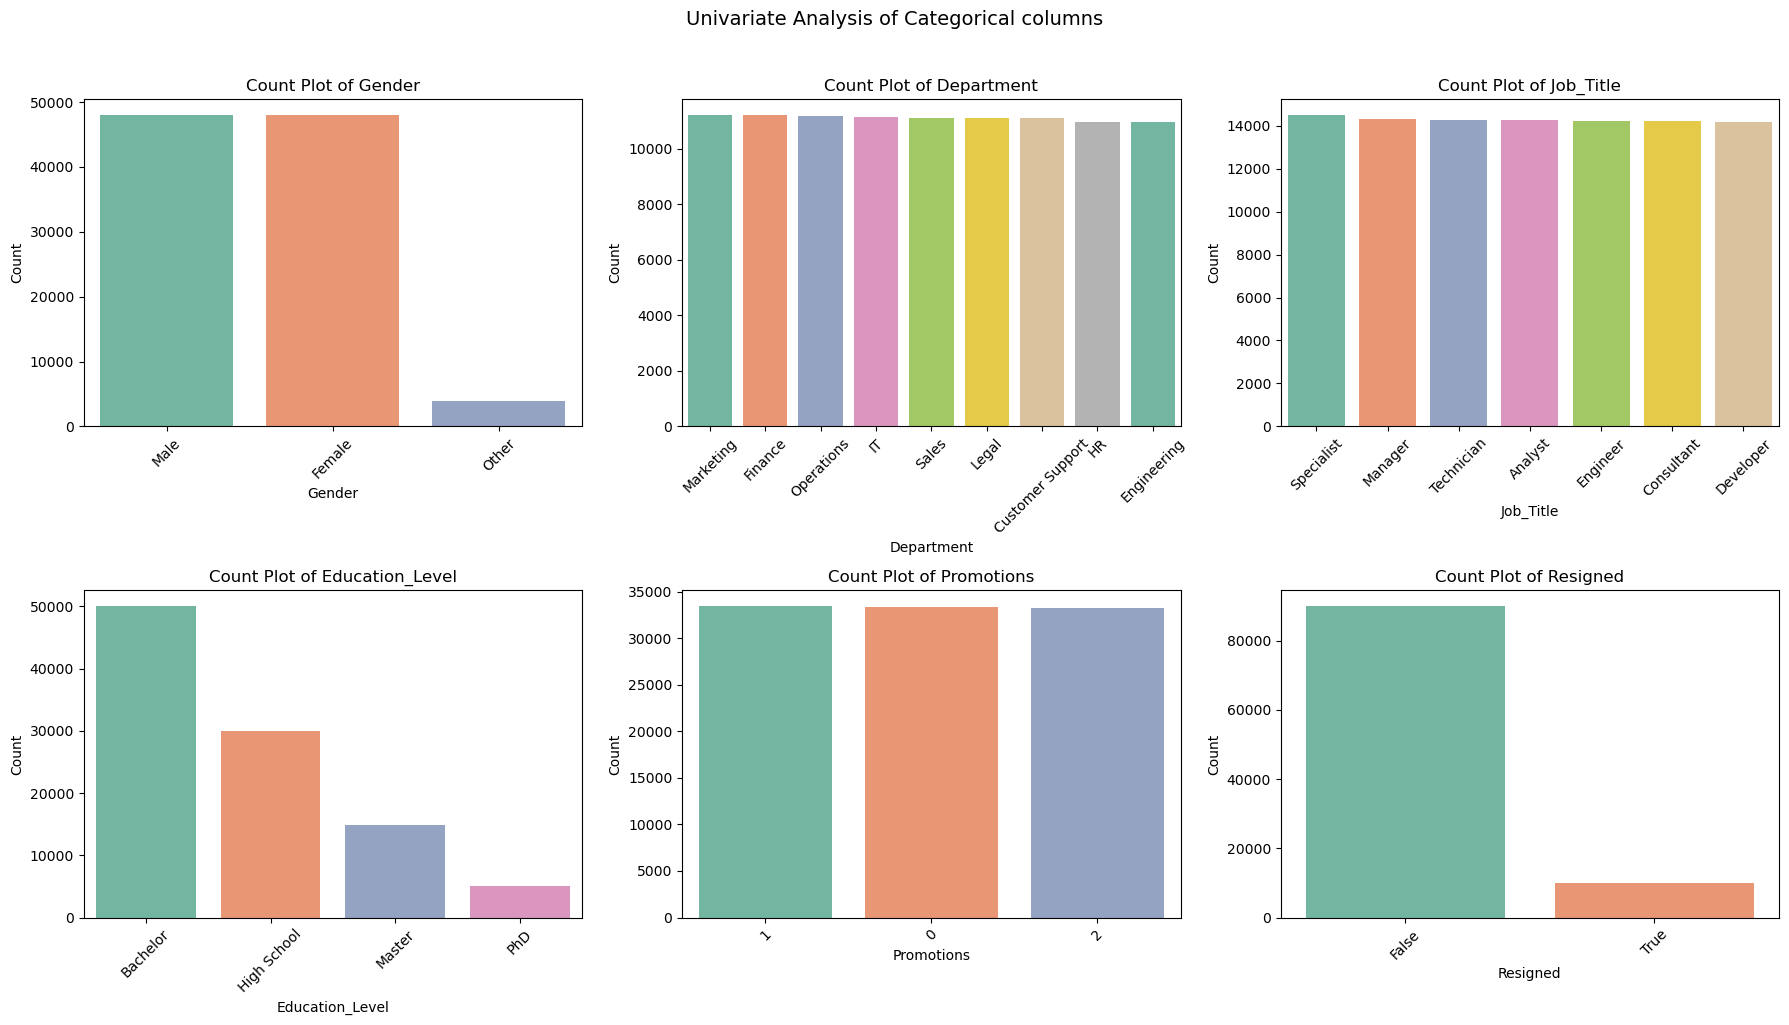

<Figure size 640x480 with 0 Axes>

In [15]:

categorical_columns = ['Gender','Department','Job_Title','Education_Level','Promotions',
       'Resigned'] 

# subplot
rows = 2
cols = 3
total_plots = len(categorical_columns)


fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten() 


for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2', order=df[column].value_counts().index)
    axes[i].set_title(f"Count Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  

fig.suptitle("Univariate Analysis of Categorical columns", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
plt.savefig("Univariate Analysis.jpg")

In [16]:
#INFERENCE
#male=female>others
#Almost equal distribution of employees in both departments and job title
#Bachelor>Highschool>Masters>PhD
#Imbalance in data --- 90%not resigned wile 10%Resigned

## Bivariate Analysis

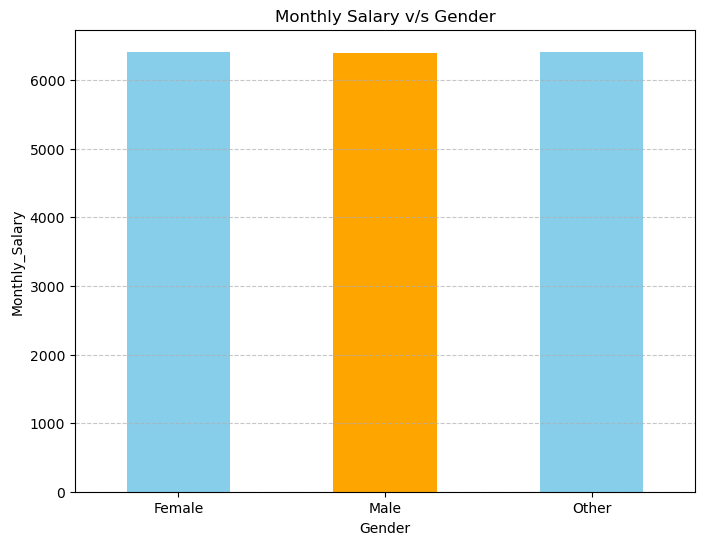

In [18]:
plt.figure(figsize=(8, 6))
salary_by_gender = df.groupby('Gender')['Monthly_Salary'].mean()
salary_by_gender.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Monthly Salary v/s Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly_Salary')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
#INFERENCE
#Gender does not affect the monthly salary

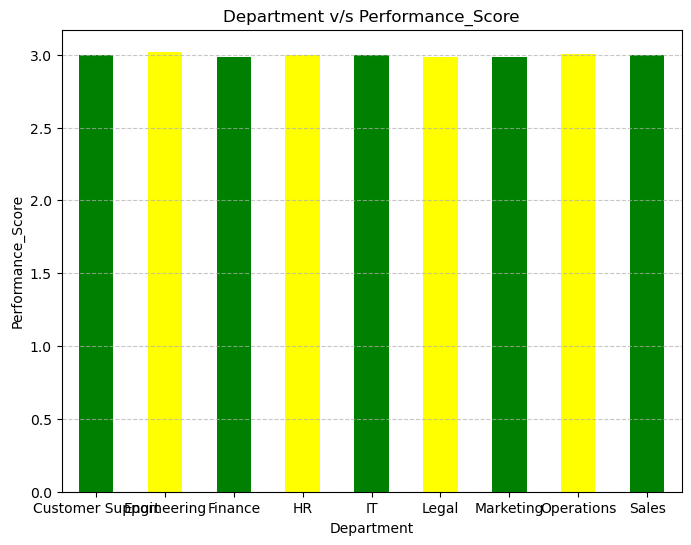

In [20]:
plt.figure(figsize=(8, 6))
salary_by_gender = df.groupby('Department')['Performance_Score'].mean()
salary_by_gender.plot(kind='bar', color=['green', 'yellow'])
plt.title('Department v/s Performance_Score')
plt.xlabel('Department')
plt.ylabel('Performance_Score')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


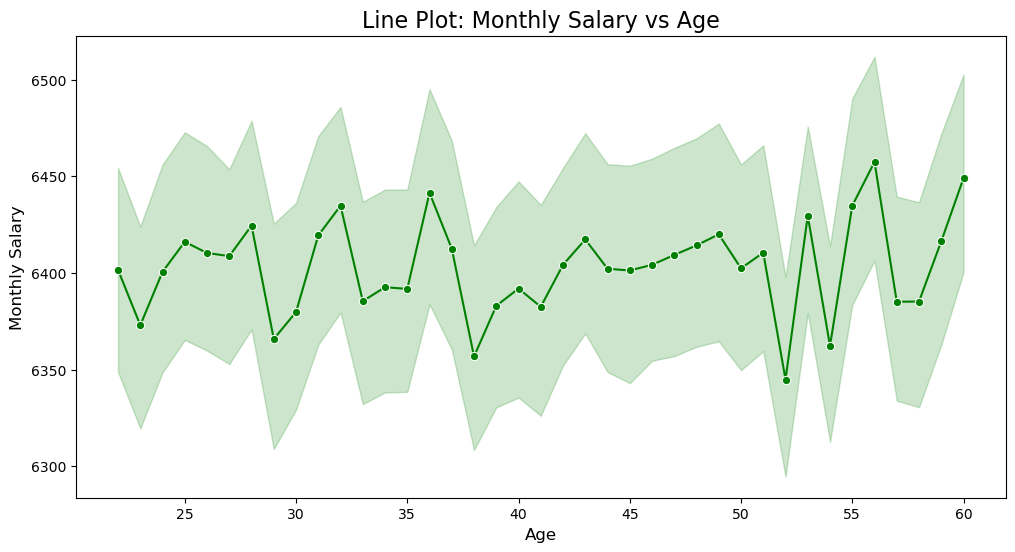

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Monthly_Salary', data=df, marker='o', color='green')
plt.title("Line Plot: Monthly Salary vs Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Monthly Salary", fontsize=12)
plt.show()

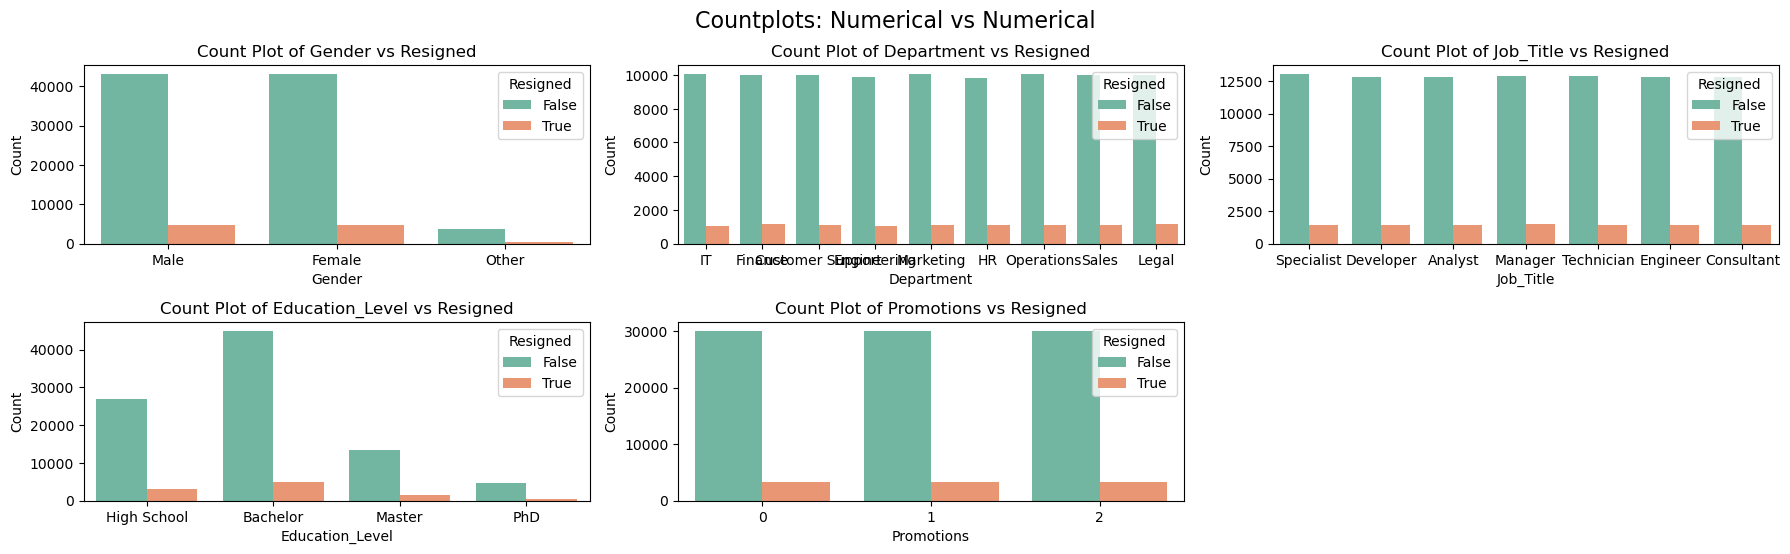

In [22]:

df['Resigned'] = df['Resigned'].astype(str)   #Without converting, error occured

# Plotting
plt.figure(figsize=(18, 10))
for i, column in enumerate(categorical_columns[:5], 1):  # Adjust if more categorical columns exist
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=column, hue='Resigned', palette='Set2')
    plt.title(f"Count Plot of {column} vs Resigned")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(title="Resigned")
    plt.tight_layout()
plt.suptitle("Countplots: Numerical vs Numerical", fontsize=16, y=1.02)
plt.show()


In [23]:
# Job_Title_counts = df['Job_Title'].value_counts().reset_index()
# Job_Title_counts.columns = ['Job_Title', 'Count']

# fig = px.bar(Job_Title_counts,
#     x = 'Job_Title',
#     y = 'Count',
#     title = "Distribution of Employees by Job Title"
# )
# fig.show()

In [24]:
# Department_counts = df['Department'].value_counts().reset_index()
# Department_counts.columns = ['Department', 'Count']

# fig = px.bar(Department_counts,
#     x = 'Department',
#     y = 'Count',
#     title = "Distribution of Employees by Department"
# )
# fig.show()

# Outlier Detection

In [26]:
Cont_Values = df[["Age", "Years_At_Company","Monthly_Salary", "Work_Hours_Per_Week", "Projects_Handled", "Overtime_Hours", "Sick_Days"
, "Remote_Work_Frequency", "Team_Size", "Training_Hours"]]

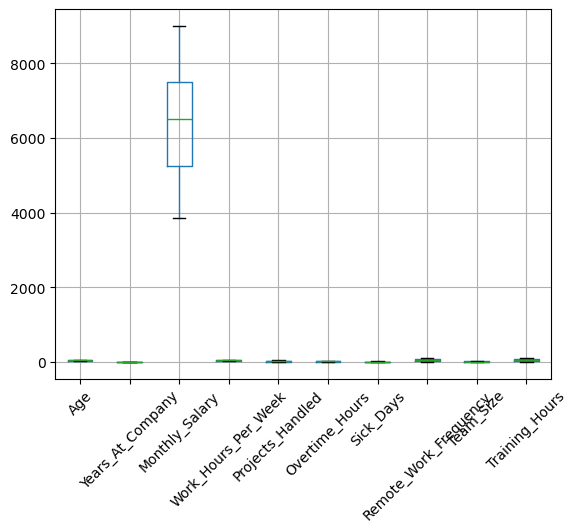

In [27]:
Cont_Values.boxplot()  #Outlier detection only done for continues numerical values, not for discrete numericals
plt.xticks(rotation=45)
plt.show()

# No outlier detected

# Encoding

In [29]:
label_enc=LabelEncoder()
df["Resigned_enc"]=label_enc.fit_transform(df["Resigned"])
df=df.drop(columns=["Resigned","Employee_ID"])
df

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned_enc
0,IT,Male,55,Specialist,2,High School,5,6750,33,32,22,2,0,14,66,0,2.63,0
1,Finance,Male,29,Developer,0,High School,5,7500,34,34,13,14,100,12,61,2,1.72,0
2,Finance,Male,55,Specialist,8,High School,3,5850,37,27,6,3,50,10,1,0,3.17,0
3,Customer Support,Female,48,Analyst,7,Bachelor,2,4800,52,10,28,12,100,10,0,1,1.86,0
4,Engineering,Female,36,Analyst,3,Bachelor,2,4800,38,11,29,13,100,15,9,1,1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Finance,Male,27,Technician,1,Bachelor,4,4900,55,46,5,3,75,16,48,2,1.28,0
99996,IT,Female,36,Consultant,6,Master,5,8250,39,35,7,0,0,10,77,1,3.48,1
99997,Operations,Male,53,Analyst,8,High School,2,4800,31,13,6,5,0,5,87,1,2.60,0
99998,HR,Female,22,Consultant,9,High School,5,8250,35,43,10,1,75,2,31,1,3.10,0


In [30]:
ordinal_enc = OrdinalEncoder()
Education_Level = ["PhD", "Master", "Bachelor", "High School"]
Job_Title = ["Manager", "Specialist", "Developer", "Engineer", "Analyst", "Consultant", "Technician"]

ordinal_enc = OrdinalEncoder(categories=[Education_Level, Job_Title])

df[["Education_Level", "Job_Title"]] = ordinal_enc.fit_transform(df[["Education_Level", "Job_Title"]])
df

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned_enc
0,IT,Male,55,1.0,2,3.0,5,6750,33,32,22,2,0,14,66,0,2.63,0
1,Finance,Male,29,2.0,0,3.0,5,7500,34,34,13,14,100,12,61,2,1.72,0
2,Finance,Male,55,1.0,8,3.0,3,5850,37,27,6,3,50,10,1,0,3.17,0
3,Customer Support,Female,48,4.0,7,2.0,2,4800,52,10,28,12,100,10,0,1,1.86,0
4,Engineering,Female,36,4.0,3,2.0,2,4800,38,11,29,13,100,15,9,1,1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Finance,Male,27,6.0,1,2.0,4,4900,55,46,5,3,75,16,48,2,1.28,0
99996,IT,Female,36,5.0,6,1.0,5,8250,39,35,7,0,0,10,77,1,3.48,1
99997,Operations,Male,53,4.0,8,3.0,2,4800,31,13,6,5,0,5,87,1,2.60,0
99998,HR,Female,22,5.0,9,3.0,5,8250,35,43,10,1,75,2,31,1,3.10,0


In [31]:
# Proportional frequency encoding
freq_encoding = df['Department'].value_counts(normalize=True)   #for nominal values --- without any realtion. Consider the proportion
df['Department_Proportion'] = df['Department'].map(freq_encoding)
df=df.drop(columns=["Department"])
df

,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned_enc,Department_Proportion
0,Male,55,1.0,2,3.0,5,6750,33,32,22,2,0,14,66,0,2.63,0,0.11131
1,Male,29,2.0,0,3.0,5,7500,34,34,13,14,100,12,61,2,1.72,0,0.11200
2,Male,55,1.0,8,3.0,3,5850,37,27,6,3,50,10,1,0,3.17,0,0.11200
3,Female,48,4.0,7,2.0,2,4800,52,10,28,12,100,10,0,1,1.86,0,0.11116
4,Female,36,4.0,3,2.0,2,4800,38,11,29,13,100,15,9,1,1.25,0,0.10956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Male,27,6.0,1,2.0,4,4900,55,46,5,3,75,16,48,2,1.28,0,0.11200
99996,Female,36,5.0,6,1.0,5,8250,39,35,7,0,0,10,77,1,3.48,1,0.11131
99997,Male,53,4.0,8,3.0,2,4800,31,13,6,5,0,5,87,1,2.60,0,0.11181
99998,Female,22,5.0,9,3.0,5,8250,35,43,10,1,75,2,31,1,3.10,0,0.10960


In [32]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))
df_encoded = pd.concat([df, gender_encoded_df], axis=1)
df_encoded.drop('Gender', axis=1, inplace=True)

df = df_encoded
df




,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned_enc,Department_Proportion,Gender_Female,Gender_Male,Gender_Other
0,55,1.0,2,3.0,5,6750,33,32,22,2,0,14,66,0,2.63,0,0.11131,0.0,1.0,0.0
1,29,2.0,0,3.0,5,7500,34,34,13,14,100,12,61,2,1.72,0,0.11200,0.0,1.0,0.0
2,55,1.0,8,3.0,3,5850,37,27,6,3,50,10,1,0,3.17,0,0.11200,0.0,1.0,0.0
3,48,4.0,7,2.0,2,4800,52,10,28,12,100,10,0,1,1.86,0,0.11116,1.0,0.0,0.0
4,36,4.0,3,2.0,2,4800,38,11,29,13,100,15,9,1,1.25,0,0.10956,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,27,6.0,1,2.0,4,4900,55,46,5,3,75,16,48,2,1.28,0,0.11200,0.0,1.0,0.0
99996,36,5.0,6,1.0,5,8250,39,35,7,0,0,10,77,1,3.48,1,0.11131,1.0,0.0,0.0
99997,53,4.0,8,3.0,2,4800,31,13,6,5,0,5,87,1,2.60,0,0.11181,0.0,1.0,0.0
99998,22,5.0,9,3.0,5,8250,35,43,10,1,75,2,31,1,3.10,0,0.10960,1.0,0.0,0.0


In [33]:
numerical_columns = df.select_dtypes(include=['int64','float64'])

correlation_matrix = numerical_columns.corr()
correlation_matrix

# plt.figure(figsize=(16, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Department_Proportion,Gender_Female,Gender_Male,Gender_Other
Age,1.000000,-0.004272,0.000078,-0.003824,0.001598,0.002757,-0.003050,-0.001726,0.001875,0.006981,-0.004672,-0.003411,0.002045,-0.002888,-0.000124,0.000792,0.000424,-0.000014,-0.001051
Job_Title,-0.004272,1.000000,0.000467,0.002917,-0.002055,-0.439830,0.002466,0.003026,0.004350,0.001820,0.002633,-0.001783,0.000050,-0.001709,-0.001054,0.004318,-0.003499,0.001282,0.005673
Years_At_Company,0.000078,0.000467,1.000000,0.000911,0.001598,-0.000645,0.002578,0.002963,0.001965,-0.004371,-0.002443,0.003250,0.002696,-0.002737,-0.003180,0.000343,0.003412,-0.002624,-0.002018
Education_Level,-0.003824,0.002917,0.000911,1.000000,-0.001827,-0.005556,0.001812,0.001520,-0.007493,0.002601,-0.002372,-0.001192,0.000826,-0.000770,0.003167,0.003729,-0.002512,0.002098,0.001061
Performance_Score,0.001598,-0.002055,0.001598,-0.001827,1.000000,0.510035,-0.005627,0.000640,-0.001312,0.002994,0.001733,-0.005174,0.002358,-0.003501,0.001696,-0.005432,-0.003405,0.003006,0.001019
Monthly_Salary,0.002757,-0.439830,-0.000645,-0.005556,0.510035,1.000000,-0.002347,-0.001925,-0.003029,0.003610,-0.000464,0.002972,-0.001088,-0.001940,0.001083,-0.003582,0.001243,-0.001912,0.001712
Work_Hours_Per_Week,-0.003050,0.002466,0.002578,0.001812,-0.005627,-0.002347,1.000000,-0.004183,0.005787,-0.000838,-0.004618,0.000790,0.001287,0.000238,0.000530,-0.003616,-0.002311,0.001161,0.002944
Projects_Handled,-0.001726,0.003026,0.002963,0.001520,0.000640,-0.001925,-0.004183,1.000000,0.004107,-0.004995,0.000484,0.003813,0.002211,-0.002344,0.006126,0.004524,-0.002635,0.002929,-0.000754
Overtime_Hours,0.001875,0.004350,0.001965,-0.007493,-0.001312,-0.003029,0.005787,0.004107,1.000000,0.004255,-0.004349,0.002175,0.002939,-0.002537,0.001052,-0.005314,0.003056,-0.002522,-0.001367
Sick_Days,0.006981,0.001820,-0.004371,0.002601,0.002994,0.003610,-0.000838,-0.004995,0.004255,1.000000,0.000478,0.000149,0.000347,-0.003044,-0.000893,-0.002263,-0.002673,0.003167,-0.001265


In [34]:
df.columns

Index(['Age', 'Job_Title', 'Years_At_Company', 'Education_Level',
       'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week',
       'Projects_Handled', 'Overtime_Hours', 'Sick_Days',
       'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions',
       'Employee_Satisfaction_Score', 'Resigned_enc', 'Department_Proportion',
       'Gender_Female', 'Gender_Male', 'Gender_Other'],
      dtype='object')

In [35]:
df.dtypes

Age                              int64
Job_Title                      float64
Years_At_Company                 int64
Education_Level                float64
Performance_Score                int64
Monthly_Salary                   int64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned_enc                     int32
Department_Proportion          float64
Gender_Female                  float64
Gender_Male                    float64
Gender_Other                   float64
dtype: object

# Scaling

In [38]:
target_column = 'Resigned'


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


numeric_columns = numeric_columns[numeric_columns != target_column]


min_max = MinMaxScaler()
df[numeric_columns] = min_max.fit_transform(df[numeric_columns])

In [43]:
df

,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned_enc,Department_Proportion,Gender_Female,Gender_Male,Gender_Other
0,0.868421,0.166667,0.2,1.000000,1.00,0.563107,0.100000,0.653061,0.758621,0.142857,0.00,0.722222,0.666667,0.0,0.4075,0,0.673077,0.0,1.0,0.0
1,0.184211,0.333333,0.0,1.000000,1.00,0.708738,0.133333,0.693878,0.448276,1.000000,1.00,0.611111,0.616162,1.0,0.1800,0,0.938462,0.0,1.0,0.0
2,0.868421,0.166667,0.8,1.000000,0.50,0.388350,0.233333,0.551020,0.206897,0.214286,0.50,0.500000,0.010101,0.0,0.5425,0,0.938462,0.0,1.0,0.0
3,0.684211,0.666667,0.7,0.666667,0.25,0.184466,0.733333,0.204082,0.965517,0.857143,1.00,0.500000,0.000000,0.5,0.2150,0,0.615385,1.0,0.0,0.0
4,0.368421,0.666667,0.3,0.666667,0.25,0.184466,0.266667,0.224490,1.000000,0.928571,1.00,0.777778,0.090909,0.5,0.0625,0,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.131579,1.000000,0.1,0.666667,0.75,0.203883,0.833333,0.938776,0.172414,0.214286,0.75,0.833333,0.484848,1.0,0.0700,0,0.938462,0.0,1.0,0.0
99996,0.368421,0.833333,0.6,0.333333,1.00,0.854369,0.300000,0.714286,0.241379,0.000000,0.00,0.500000,0.777778,0.5,0.6200,1,0.673077,1.0,0.0,0.0
99997,0.815789,0.666667,0.8,1.000000,0.25,0.184466,0.033333,0.265306,0.206897,0.357143,0.00,0.222222,0.878788,0.5,0.4000,0,0.865385,0.0,1.0,0.0
99998,0.000000,0.833333,0.9,1.000000,1.00,0.854369,0.166667,0.877551,0.344828,0.071429,0.75,0.055556,0.313131,0.5,0.5250,0,0.015385,1.0,0.0,0.0


# Classification

In [49]:
y=df['Resigned_enc']
X = df.drop('Resigned_enc',axis = 1)

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

## Handling Class Imbalance

In [52]:
X = df.drop('Resigned_enc', axis=1)
y = df['Resigned_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

df = pd.concat([X_resampled, y_resampled], axis=1)

In [53]:
df.shape

(126042, 20)

In [56]:
df.columns

Index(['Age', 'Job_Title', 'Years_At_Company', 'Education_Level',
       'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week',
       'Projects_Handled', 'Overtime_Hours', 'Sick_Days',
       'Remote_Work_Frequency', 'Team_Size', 'Training_Hours', 'Promotions',
       'Employee_Satisfaction_Score', 'Department_Proportion', 'Gender_Female',
       'Gender_Male', 'Gender_Other', 'Resigned_enc'],
      dtype='object')

In [60]:
df["Resigned_enc"].value_counts()

Resigned_enc
0    63021
1    63021
Name: count, dtype: int64

## Logistic Regression

In [83]:

log_reg = LogisticRegression(class_weight='balanced', max_iter=500)
log_reg.fit(X_resampled, y_resampled)
y_pred = log_reg.predict(X_test)

print("\nLogistic Regression Metrics:")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))


Logistic Regression Metrics:
Accuracy: 0.49333333333333335
Precision: 0.8194932788081143
Recall: 0.49333333333333335
F1-Score: 0.5883219184704852


## Naive Bayes

In [82]:
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)  
y_pred_nb = nb_model.predict(X_test)   


print("Naive Bayes Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Results:
Confusion Matrix:
 [[14839 12130]
 [ 1662  1369]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.55      0.68     26969
           1       0.10      0.45      0.17      3031

    accuracy                           0.54     30000
   macro avg       0.50      0.50      0.42     30000
weighted avg       0.82      0.54      0.63     30000

Accuracy: 0.5402666666666667


# K nearest neighbour (KNN)

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)

y_pred_Knn = knn.predict(X_test)

print("\nKNN Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_Knn))
print("Precision:", precision_score(y_test, y_pred_Knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_Knn, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_Knn, average='weighted'))


KNN Metrics:
Accuracy: 0.5930333333333333
Precision: 0.8198121436512222
Recall: 0.5930333333333333
F1-Score: 0.6737604650619796


## Decision Tree

In [85]:
dt_model=DecisionTreeClassifier(class_weight='balanced',max_depth=10, min_samples_split=4)
dt_model.fit(X_resampled, y_resampled)
y_pred_DT = dt_model.predict(X_test)

print("\nDecision Tree Metrics:")
print('Accuracy:', accuracy_score(y_test, y_pred_DT))
print('Precision:', precision_score(y_test, y_pred_DT, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_DT, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred_DT, average='weighted'))


Decision Tree Metrics:
Accuracy: 0.8955666666666666
Precision: 0.8156245794288265
Recall: 0.8955666666666666
F1-score: 0.8500009476566205


In [86]:
# from sklearn.metrics import classification_report, roc_auc_score

# # Evaluate Naive Bayes model with SMOTE
# print("Naive Bayes Classification Report:")
# print(classification_report(y_test, y_pred_nb))
# print("ROC-AUC Score (Naive Bayes):", roc_auc_score(y_test, y_pred_nb))

# # Evaluate Decision Tree model with balanced class weight
# print("\nDecision Tree Classification Report:")
# print(classification_report(y_test, y_pred_dt))
# print("ROC-AUC Score (Decision Tree):", roc_auc_score(y_test, y_pred_dt))


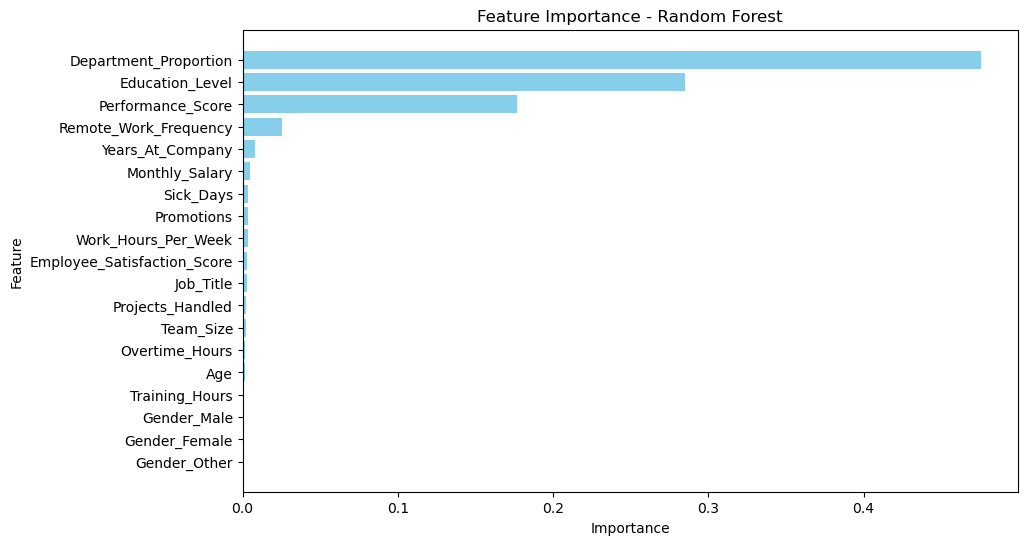

In [87]:
importances = dt_model.feature_importances_


feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis() 
plt.show()

## HyperparameterTuning for Decision Tree

In [103]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],         # Splitting criteria
    'max_depth': [10, 20, 30, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']    # Number of features to consider when looking for the best split
}

# Initialize DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Train the GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best estimator to predict on the test set
best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the tuned Decision Tree model on the test set
print("\nTuned Decision Tree Metrics:")
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_dt, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred_dt, average='weighted'))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

Tuned Decision Tree Metrics:
Accuracy: 0.8098
Precision: 0.8172881719963336
Recall: 0.8098
F1-Score: 0.8135024214432391


### Random Forest

In [92]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4)  


rf.fit(X_resampled, y_resampled)


y_pred_rf = rf.predict(X_test)


print("\nRandom Forest Metrics :")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))


Random Forest Metrics :
Accuracy: 0.8046666666666666
Precision: 0.818188936004766
Recall: 0.8046666666666666
F1-Score: 0.8112897743843849


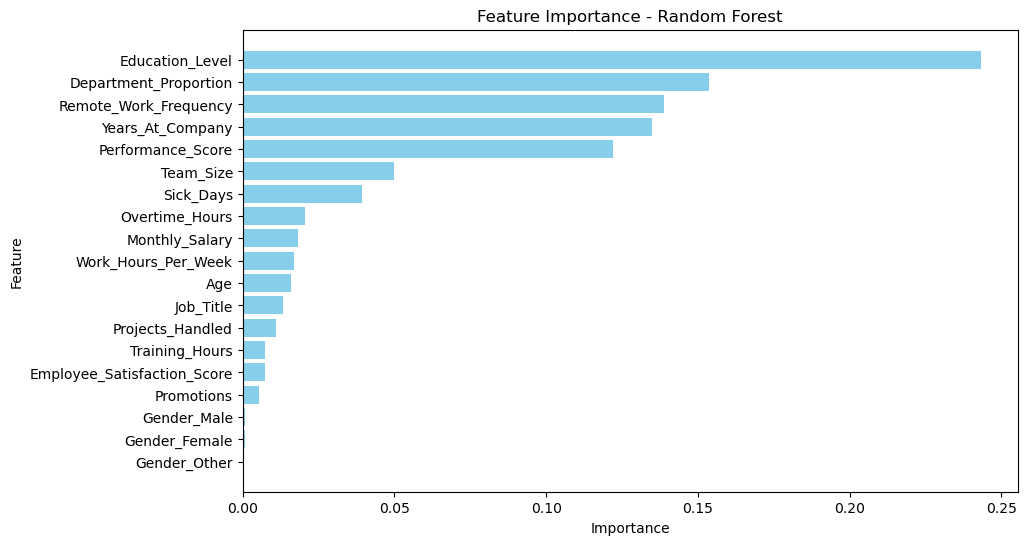

In [93]:
importances = rf.feature_importances_


feature_names = X_train.columns  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis() 
plt.show()

## XG Boost

In [77]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_resampled, y_resampled)

# Predict using the XGBoost Classifier
y_pred_XGB = xgb_classifier.predict(X_test)

# Print metrics
print("\nXGBoost Metrics:")
print('accuracy:', accuracy_score(y_test, y_pred_XGB))
print('precision:', precision_score(y_test, y_pred_XGB, average='weighted'))
print('recall:', recall_score(y_test, y_pred_XGB, average='weighted'))
print('f1_score:', f1_score(y_test, y_pred_XGB, average='weighted'))



XGBoost Metrics:
accuracy: 0.8989
precision: 0.8334172589678625
recall: 0.8989
f1_score: 0.8511693658943446


## Hyperparameter Tuning of Random Forest

In [96]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],               # Number of trees in the forest
    'max_depth': [ 20, None],               # Maximum depth of the tree
    'min_samples_split': [2, 4, 6],                # Minimum samples required to split an internal node
    'min_samples_leaf': [2, 4],                 # Minimum samples required at a leaf node
    'max_features': ['sqrt'],       # Number of features to consider at each split
    'bootstrap': [True, False]                     # Whether bootstrap samples are used when building trees
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Train the GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best estimator to predict on the test set
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model on the test set
print("\nTuned Random Forest Metrics:")
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_rf, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred_rf, average='weighted'))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}

Tuned Random Forest Metrics:
Accuracy: 0.8989666666666667
Precision: 0.8081410677777778
Recall: 0.8989666666666667
F1-Score: 0.851137707642168


## Hyperparameter Tuning of XG Booster

In [96]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a smaller parameter distribution
param_dist = {
    'n_estimators': [100, 200],        # Number of trees
    'max_depth': [3, 5],              # Maximum depth of each tree
    'learning_rate': [0.1, 0.2],      # Step size shrinkage
    'subsample': [0.8],               # Fraction of samples used per tree
    'colsample_bytree': [0.8],        # Fraction of features used per tree
    'gamma': [0, 0.1]                 # Minimum loss reduction required
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    scoring='f1_weighted',  # Use F1 weighted for evaluation
    cv=3,  # 3-fold cross-validation
    verbose=1,  # Show progress
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model with RandomizedSearchCV
random_search.fit(X_resampled, y_resampled)

# Get the best parameters and model
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Train the best model
best_xgb_classifier = random_search.best_estimator_
best_xgb_classifier.fit(X_resampled, y_resampled)

# Predict using the best model
y_pred_XGB = best_xgb_classifier.predict(X_test)

# Print evaluation metrics
print("\nXGBoost Metrics with Best Parameters:")
print('accuracy:', accuracy_score(y_test, y_pred_XGB))
print('precision:', precision_score(y_test, y_pred_XGB, average='weighted'))
print('recall:', recall_score(y_test, y_pred_XGB, average='weighted'))
print('f1_score:', f1_score(y_test, y_pred_XGB, average='weighted'))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best F1 Score: 0.9417906937508688

XGBoost Metrics with Best Parameters:
accuracy: 0.8989333333333334
precision: 0.808138040156894
recall: 0.8989333333333334
f1_score: 0.8511210878621916


In [91]:
import pickle
import joblib

with open('grid_search_rf.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

print("Best rf model saved as 'grid_search_rf.pkl'")
    


NameError: name 'dt_clf' is not defined

In [ ]:
import pickle
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd


ordinal_enc = OrdinalEncoder(categories=[Education_Level, Job_Title])
ordinal_enc.fit(df[['Education_Level', 'Job_Title']])  


onehot_enc = OneHotEncoder(sparse_output=False)
onehot_enc.fit(df[['Gender']]) 

freq_encoding = df['Department'].value_counts(normalize=True)  
freq_encoding_dict = freq_encoding.to_dict() 


with open("ordinal_encoder.pkl", "wb") as oe_file:
    pickle.dump(ordinal_enc, oe_file)


with open("one_hot_encoder.pkl", "wb") as ohe_file:
    pickle.dump(onehot_enc, ohe_file)

with open("frequency_encoder.pkl", "wb") as fe_file:
    pickle.dump(freq_encoding_dict, fe_file)

print("Encoders and frequency mapping saved as pickle files.")
